# {index}`Applied Linear Algebra <single: Applied Linear Algebra>`

**Prerequisites**

- {doc}`Introduction to Numpy <numpy_arrays>`

**Outcomes**

- Refresh some important linear algebra concepts
- Apply concepts to understanding unemployment and pricing portfolios
- Use `numpy` to do linear algebra operations


```{literalinclude} ../_static/colab_light.raw
```

In [1]:
# import numpy to prepare for code below
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Vectors and Matrices

### Vectors

A (N-element) vector is $N$ numbers stored together.

We typically write a vector as $x = \begin{bmatrix} x_1 \\ x_2 \\ \dots \\ x_N \end{bmatrix}$.

In numpy terms, a vector is a 1-dimensional array.

We often think of 2-element vectors as directional lines in the XY axes.

This image, from the [QuantEcon Python lecture](https://python.quantecon.org/linear_algebra.html)
is an example of what this might look like for the vectors `(-4, 3.5)`, `(-3, 3)`, and `(2, 4)`.

```{figure} ../_static/vector.png
:alt: vector.png
```

In a previous lecture, we saw some types of operations that can be done on
vectors, such as

In [2]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

**Element-wise operations**: Let $z = x ? y$ for some operation $?$, one of
the standard *binary* operations ($+, -, \times, \div$). Then we can write
$z = \begin{bmatrix} x_1 ? y_1 & x_2 ? y_2 \end{bmatrix}$. Element-wise operations require
that $x$ and $y$ have the same size.

In [3]:
print("Element-wise Addition", x + y)
print("Element-wise Subtraction", x - y)
print("Element-wise Multiplication", x * y)
print("Element-wise Division", x / y)

Element-wise Addition [5 7 9]
Element-wise Subtraction [-3 -3 -3]
Element-wise Multiplication [ 4 10 18]
Element-wise Division [0.25 0.4  0.5 ]


**Scalar operations**: Let $w = a ? x$ for some operation $?$, one of the
standard *binary* operations ($+, -, \times, \div$). Then we can write
$w = \begin{bmatrix} a ? x_1 & a ? x_2 \end{bmatrix}$.

In [4]:
print("Scalar Addition", 3 + x)
print("Scalar Subtraction", 3 - x)
print("Scalar Multiplication", 3 * x)
print("Scalar Division", 3 / x)

Scalar Addition [4 5 6]
Scalar Subtraction [2 1 0]
Scalar Multiplication [3 6 9]
Scalar Division [3.  1.5 1. ]


Another operation very frequently used in data science is the **dot product**.

The dot between $x$ and $y$ is written $x \cdot y$ and is
equal to $\sum_{i=1}^N x_i y_i$.

In [5]:
print("Dot product", np.dot(x, y))

Dot product 32


We can also use `@` to denote dot products (and matrix multiplication which we'll see soon!).

In [6]:
print("Dot product with @", x @ y)

Dot product with @ 32


````{admonition} Exercise
:name: dir3-3-1

See exercise 1 in the {ref}`exercise list <ex3-3>`.
````

In [7]:
nA = 100
nB = 50
nassets = np.array([nA, nB])

i = 0.05
durationA = 6
durationB = 4

# Do your computations here

# Compute price

# uncomment below to see a message!
# if condition:
#     print("Alice can retire")
# else:
#     print("Alice cannot retire yet")

### Matrices

An $N \times M$ matrix can be thought of as a collection of M
N-element vectors stacked side-by-side as columns.

We write a matrix as

$$
\begin{bmatrix} x_{11} & x_{12} & \dots & x_{1M} \\
                x_{21} & \dots & \dots & x_{2M} \\
                \vdots & \vdots & \vdots & \vdots \\
                x_{N1} & x_{N2} & \dots & x_{NM}
\end{bmatrix}
$$

In numpy terms, a matrix is a 2-dimensional array.

We can create a matrix by passing a list of lists to the `np.array` function.

In [8]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.ones((2, 3))
z = np.array([[1, 2], [3, 4], [5, 6]])

We can perform element-wise and scalar operations as we did with vectors. In fact, we can do
these two operations on arrays of any dimension.

In [9]:
print("Element-wise Addition\n", x + y)
print("Element-wise Subtraction\n", x - y)
print("Element-wise Multiplication\n", x * y)
print("Element-wise Division\n", x / y)

print("Scalar Addition\n", 3 + x)
print("Scalar Subtraction\n", 3 - x)
print("Scalar Multiplication\n", 3 * x)
print("Scalar Division\n", 3 / x)

Element-wise Addition
 [[2. 3. 4.]
 [5. 6. 7.]]
Element-wise Subtraction
 [[0. 1. 2.]
 [3. 4. 5.]]
Element-wise Multiplication
 [[1. 2. 3.]
 [4. 5. 6.]]
Element-wise Division
 [[1. 2. 3.]
 [4. 5. 6.]]
Scalar Addition
 [[4 5 6]
 [7 8 9]]
Scalar Subtraction
 [[ 2  1  0]
 [-1 -2 -3]]
Scalar Multiplication
 [[ 3  6  9]
 [12 15 18]]
Scalar Division
 [[3.   1.5  1.  ]
 [0.75 0.6  0.5 ]]


Similar to how we combine vectors with a dot product, matrices can do what we'll call *matrix
multiplication*.

Matrix multiplication is effectively a generalization of dot products.

**Matrix multiplication**: Let $v = x \cdot y$ then we can write
$v_{ij} = \sum_{k=1}^N x_{ik} y_{kj}$ where $x_{ij}$ is notation that denotes the
element found in the ith row and jth column of the matrix $x$.

The image below from [Wikipedia](https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram.svg),
by Bilou, shows how matrix multiplication simplifies to a series of dot products:

```{figure} ../_static/mat_mult_wiki_bilou.png
:alt: matmult.png
```

After looking at the math and image above, you might have realized that matrix
multiplication requires very specific matrix shapes!

For two matrices $x, y$ to be multiplied, $x$
must have the same number of columns as $y$ has rows.

Formally, we require that for some integer numbers, $M, N,$ and $K$
that if $x$ is $N \times M$ then $y$ must be $M \times
K$.

If we think of a vector as a $1 \times M$ or $M \times 1$ matrix, we can even do
matrix multiplication between a matrix and a vector!

Let's see some examples of this.

In [10]:
x1 = np.reshape(np.arange(6), (3, 2))
x2 = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
x3 = np.array([[2, 5, 2], [1, 2, 1]])
x4 = np.ones((2, 3))

y1 = np.array([1, 2, 3])
y2 = np.array([0.5, 0.5])

Numpy allows us to do matrix multiplication in three ways.

In [11]:
print("Using the matmul function for two matrices")
print(np.matmul(x1, x4))
print("Using the dot function for two matrices")
print(np.dot(x1, x4))
print("Using @ for two matrices")
print(x1 @ x4)

Using the matmul function for two matrices
[[1. 1. 1.]
 [5. 5. 5.]
 [9. 9. 9.]]
Using the dot function for two matrices
[[1. 1. 1.]
 [5. 5. 5.]
 [9. 9. 9.]]
Using @ for two matrices
[[1. 1. 1.]
 [5. 5. 5.]
 [9. 9. 9.]]


In [12]:
print("Using the matmul function for vec and mat")
print(np.matmul(y1, x1))
print("Using the dot function for vec and mat")
print(np.dot(y1, x1))
print("Using @ for vec and mat")
print(y1 @ x1)

Using the matmul function for vec and mat
[16 22]
Using the dot function for vec and mat
[16 22]
Using @ for vec and mat
[16 22]


Despite our options, we stick to using `@` because
it is simplest to read and write.


````{admonition} Exercise
:name: dir3-3-2

See exercise 2 in the {ref}`exercise list <ex3-3>`.
````


### Other Linear Algebra Concepts

#### Transpose

A matrix transpose is an operation that flips all elements of a matrix along the diagonal.

More formally, the $(i, j)$ element of $x$ becomes the $(j, i)$ element of
$x^T$.

In particular, let $x$ be given by

$$
x = \begin{bmatrix} 1 & 2 & 3 \\
                    4 & 5 & 6 \\
                    7 & 8 & 9 \\
    \end{bmatrix}
$$

then $x$ transpose, written as $x'$, is given by

$$
x = \begin{bmatrix} 1 & 4 & 7 \\
                    2 & 5 & 8 \\
                    3 & 6 & 9 \\
    \end{bmatrix}
$$

In Python, we do this by

In [13]:
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("x transpose is")
print(x.transpose())

x transpose is
[[1 4 7]
 [2 5 8]
 [3 6 9]]


#### Identity Matrix

In linear algebra, one particular matrix acts very similarly to how 1 behaves for scalar numbers.

This matrix is known as the *identity matrix* and is given by

$$
I = \begin{bmatrix} 1  & 0 & 0 & \dots & 0 \\
                    0 & 1 & 0 & \dots & 0 \\
                    \vdots & \vdots & \ddots & \vdots & \vdots \\
                    0 & 0 & 0 & \dots & 1
    \end{bmatrix}
$$

As seen above, it has 1s on the diagonal and 0s everywhere else.

When we multiply any matrix or vector by the identity matrix, we get the original matrix or vector
back!

Let's see some examples.

In [14]:
I = np.eye(3)
x = np.reshape(np.arange(9), (3, 3))
y = np.array([1, 2, 3])

print("I @ x", "\n", I @ x)
print("x @ I", "\n", x @ I)
print("I @ y", "\n", I @ y)
print("y @ I", "\n", y @ I)

I @ x 
 [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
x @ I 
 [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
I @ y 
 [1. 2. 3.]
y @ I 
 [1. 2. 3.]


#### Inverse

If you recall, you learned in your primary education about solving equations for certain variables.

For example, you might have been given the equation

$$
3x + 7 = 16
$$

and then asked to solve for $x$.

You probably did this by subtracting 7 and then dividing by 3.

Now let's write an equation that contains matrices and vectors.

$$
\begin{bmatrix} 1 & 2 \\ 3 & 1 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}
$$

How would we solve for $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$?

Unfortunately, there is no "matrix divide" operation that does the opposite of matrix multiplication.

Instead, we first have to do what's known as finding the inverse. We must multiply both sides by this inverse to solve.

Consider some matrix $A$.

The inverse of $A$, given by $A^{-1}$, is a matrix such that $A A^{-1} = I$
where $I$ is our identity matrix.

Notice in our equation above, if we can find the inverse of
$\begin{bmatrix} 1 & 2 \\ 3 & 1 \end{bmatrix}$ then we can multiply both sides by the inverse
to get

$$
\begin{align*}
\begin{bmatrix} 1 & 2 \\ 3 & 1 \end{bmatrix}^{-1}\begin{bmatrix} 1 & 2 \\ 3 & 1 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} &= \begin{bmatrix} 1 & 2 \\ 3 & 1 \end{bmatrix}^{-1}\begin{bmatrix} 3 \\ 4 \end{bmatrix} \\
I \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} &= \begin{bmatrix} 1 & 2 \\ 3 & 1 \end{bmatrix}^{-1} \begin{bmatrix} 3 \\ 4 \end{bmatrix} \\
 \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} &= \begin{bmatrix} 1 & 2 \\ 3 & 1 \end{bmatrix}^{-1} \begin{bmatrix} 3 \\ 4 \end{bmatrix}
\end{align*}
$$

Computing the inverse requires that a matrix be square and satisfy some other conditions
(non-singularity) that are beyond the scope of this lecture.

We also skip the exact details of how this inverse is computed, but, if you are interested,
you can visit the
[QuantEcon Linear Algebra lecture](https://python.quantecon.org/linear_algebra.html)
for more details.

We demonstrate how to compute the inverse with numpy below.

In [15]:
# This is a square (N x N) non-singular matrix
A = np.array([[1, 2, 0], [3, 1, 0], [0, 1, 2]])

print("This is A inverse")

print(np.linalg.inv(A))

print("Check that A @ A inverse is I")
print(np.linalg.inv(A) @ A)

This is A inverse
[[-0.2  0.4  0. ]
 [ 0.6 -0.2  0. ]
 [-0.3  0.1  0.5]]
Check that A @ A inverse is I
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.77555756e-17  1.00000000e+00  0.00000000e+00]
 [-1.38777878e-17  0.00000000e+00  1.00000000e+00]]


## Portfolios

In {doc}`control flow <../python_fundamentals/control_flow>`, we learned to value a stream of payoffs from a single
asset.

In this section, we generalize this to value a portfolio of multiple assets, or an asset
that has easily separable components.

Vectors and inner products give us a convenient way to organize and calculate these payoffs.

### Static Payoffs

As an example, consider a portfolio with 4 units of asset A, 2.5 units of asset B, and 8 units of
asset C.

At a particular point in time, the assets pay $3$/unit of asset A, $5$/unit of B, and
$1.10$/unit of C.

First, calculate the value of this portfolio directly with a sum.

In [16]:
4.0 * 3.0 + 2.5 * 5.0 + 8 * 1.1

33.3

We can make this more convenient and general by using arrays for accounting, and then sum then in a
loop.

In [17]:
import numpy as np
x = np.array([4.0, 2.5, 8.0]) # portfolio units
y = np.array([3.0, 5.0, 1.1]) # payoffs
n = len(x)
p = 0.0
for i in range(n): # i.e. 0, 1, 2
    p = p + x[i] * y[i]

p

33.3

The above would have worked with `x` and `y` as `list` rather than `np.array`.

Note that the general pattern above is the sum.

$$
p = \sum_{i=0}^{n-1} x_i y_i = x \cdot y
$$

This is an inner product as implemented by the `np.dot` function

In [18]:
np.dot(x, y)

33.3

This approach allows us to simultaneously price different portfolios by stacking them in a matrix and using the dot product.

In [19]:
y = np.array([3.0, 5.0, 1.1]) # payoffs
x1 = np.array([4.0, 2.5, 8.0]) # portfolio 1
x2 = np.array([2.0, 1.5, 0.0]) # portfolio 2
X = np.array((x1, x2))

# calculate with inner products
p1 = np.dot(X[0,:], y)
p2 = np.dot(X[1,:], y)
print("Calculating separately")
print([p1, p2])

# or with a matrix multiplication
print("Calculating with matrices")
P = X @ y
print(P)

Calculating separately
[33.3, 13.5]
Calculating with matrices
[33.3 13.5]


### NPV of a Portfolio

If a set of assets has payoffs over time, we can calculate the NPV of that portfolio in a similar way to the calculation in
{ref}`npv <npv>`.

First, consider an example with an asset with claims to multiple streams of payoffs which are easily
separated.

You are considering purchasing an oilfield with 2 oil wells, named `A` and `B` where

- Both oilfields have a finite lifetime of 20 years.
- In oilfield `A`, you can extract 5 units in the first year, and production in each subsequent year
  decreases by $20\%$ of the previous year so that
  $x^A_0 = 5, x^A_1 = 0.8 \times 5, x^A_2 = 0.8^2 \times 5, \ldots$
- In oilfield `B`, you can extract 2 units in the first year, but production only drops by
  $10\%$ each year (i.e. $x^B_0 = 2, x^B_1 = 0.9 \times 2, x^B_2 = 0.9^2 \times 2, \ldots$
- Future cash flows are discounted at a rate of $r = 0.05$ each year.
- The price for oil in both wells are normalized as $p_A = p_B = 1$.

These traits can be separated so that the price you would be willing to pay is the sum of the two, where
we define $\gamma_A = 0.8, \gamma_B = 0.9$.

$$
\begin{aligned}
V_A &= \sum_{t=0}^{T-1} \left(\frac{1}{1 + r}\right)^t p_A y^A_t = \sum_{t=0}^{T-1} \left(\frac{1}{1 + r}\right)^t (p_A \, x_{A0}\, \gamma_A^t)\\
V_B &= \sum_{t=0}^{T-1} \left(\frac{1}{1 + r}\right)^t p_B y^B_t = \sum_{t=0}^{T-1} \left(\frac{1}{1 + r}\right)^t (p_B \, x_{B0}\, \gamma_B^t)\\
V &= V_A + V_B
\end{aligned}
$$

Let's compute the value of each of these assets using the dot product.

The first question to ask yourself is: "For which two vectors should I compute the dot product?"

It turns out that this depends on which two vectors you'd like to create.

One reasonable choice is presented in the code below.

In [20]:
# Depreciation of production rates
gamma_A = 0.80
gamma_B = 0.90

# Interest rate discounting
r = 0.05
discount = np.array([(1 / (1+r))**t for t in range(20)])

# Let's first create arrays that have the production of each oilfield
oil_A = 5 * np.array([gamma_A**t for t in range(20)])
oil_B = 2 * np.array([gamma_B**t for t in range(20)])
oilfields = np.array([oil_A, oil_B])

# Use matrix multiplication to get discounted sum of oilfield values and then sum
# the two values
Vs = oilfields @ discount

print(f"The npv of oilfields is {Vs.sum()}")

The npv of oilfields is 34.267256487477496


Now consider the approximation where instead of the oilfields having a finite lifetime of 20 years,
we let them produce forever, i.e. $T = \infty$.

With a little algebra,

$$
V_A = p_A \sum_{t=0}^{\infty}\left(\frac{1}{1 + r}\right)^t (x_{A0} \gamma_A^t) = x_{A0}\sum_{t=0}^{\infty}\left(\frac{\gamma_A}{1 + r}\right)^t
$$

And, using the infinite sum formula from {doc}`Control Flow <../python_fundamentals/control_flow>` (i.e. $\sum_{t=0}^{\infty}\beta^t = (1 - \beta)^{-1}$)

$$
= \frac{p_A x_{A0}}{1 - \left(\gamma_A\frac{1}{1 + r} \right)}
$$

The $V_B$ is defined symmetrically.

How different is this infinite horizon approximation from the $T = 20$ version, and why?

Now, let's compute the $T = \infty$ version of the net present value and make a graph to help
us see how many periods are needed to approach the infinite horizon value.

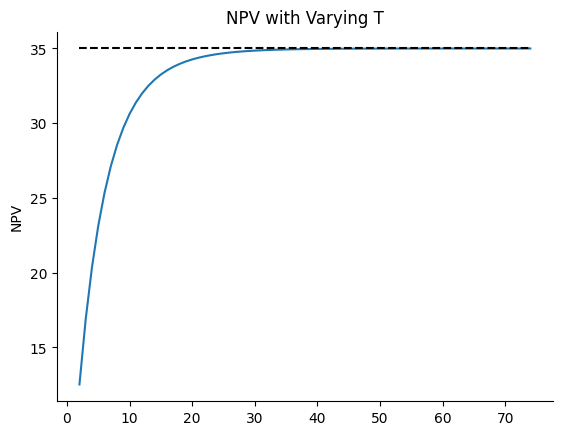

In [21]:
# Depreciation of production rates
gamma_A = 0.80
gamma_B = 0.90

# Interest rate discounting
r = 0.05


def infhor_NPV_oilfield(starting_output, gamma, r):
    beta = gamma / (1 + r)
    return starting_output / (1 - beta)


def compute_NPV_oilfield(starting_output, gamma, r, T):
    outputs = starting_output * np.array([gamma**t for t in range(T)])
    discount = np.array([(1 / (1+r))**t for t in range(T)])

    npv = np.dot(outputs, discount)

    return npv

Ts = np.arange(2, 75)

NPVs_A = np.array([compute_NPV_oilfield(5, gamma_A, r, t) for t in Ts])
NPVs_B = np.array([compute_NPV_oilfield(2, gamma_B, r, t) for t in Ts])

NPVs_T = NPVs_A + NPVs_B
NPV_oo = infhor_NPV_oilfield(5, gamma_A, r) + infhor_NPV_oilfield(2, gamma_B, r)

fig, ax = plt.subplots()

ax.set_title("NPV with Varying T")
ax.set_ylabel("NPV")

ax.plot(Ts, NPVs_A + NPVs_B)
ax.hlines(NPV_oo, Ts[0], Ts[-1], color="k", linestyle="--")  # Plot infinite horizon value

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

It is also worth noting that the computation of the infinite horizon net present value can be
simplified even further by using matrix multiplication. That is, the formula given above is
equivalent to

$$
V = \begin{bmatrix}p_A & p_B \end{bmatrix} \cdot \sum_{t=0}^{\infty} \left(\left(\frac{1}{1 + r}\right)^t \begin{bmatrix} \gamma_A & 0 \\ 0 & \gamma_B \end{bmatrix}^t \cdot x_0\right)
$$

and where $x_0 = \begin{bmatrix} x_{A0} \\ x_{B0} \end{bmatrix}$.

We recognize that this equation is of the form

$$
V = G \sum_{t=0}^{\infty} \left(\frac{1}{1 + r}\right)^t A^t x_0
$$

Without proof, and given important assumptions on $\frac{1}{1 + r}$ and $A$, this
equation reduces to

```{math}
:label: eq_deterministic_asset_pricing

V = G \left(I - \frac{1}{1+r} A\right)^{-1} x_0
```

Using the matrix inverse, where `I` is the identity matrix.

In [22]:
p_A = 1.0
p_B = 1.0
G = np.array([p_A, p_B])

r = 0.05
beta = 1 / (1 + r)

gamma_A = 0.80
gamma_B = 0.90
A = np.array([[gamma_A, 0], [0, gamma_B]])

x_0 = np.array([5, 2])

# Compute with matrix formula
NPV_mf = G @ np.linalg.inv(np.eye(2) - beta*A) @ x_0

print(NPV_mf)

34.99999999999999


Note: While our matrix above was very simple, this approach works for much more
complicated `A` matrices as long as we can write $x_t$ using $A$ and $x_0$ as
$x_t = A^t x_0$ (For an advanced description of this topic, adding randomness, read about
linear state-space models with Python <https://python.quantecon.org/linear_models.html>).

### Unemployment Dynamics

Consider an economy where in any given year, $\alpha = 5\%$ of workers lose their jobs and
$\phi = 10\%$ of unemployed workers find jobs.

Define the vector $x_0 = \begin{bmatrix} 900,000 & 100,000 \end{bmatrix}$ as the number of
employed and unemployed workers (respectively) at time $0$ in the economy.

Our goal is to determine the dynamics of unemployment in this economy.

First, let's define the matrix.

$$
A = \begin{bmatrix} 1 - \alpha & \alpha \\ \phi & 1 - \phi \end{bmatrix}
$$

Note that with this definition, we can describe the evolution of employment and unemployment
from $x_0$ to $x_1$ using linear algebra.

$$
x_1 = \begin{bmatrix} (1 - \alpha) 900,000 + \phi 100,000 \\ \alpha 900,000 + (1-\phi) 100,000\end{bmatrix} = A' x_0
$$

However, since the transitions do not change over time, we can use this to describe the evolution
from any arbitrary time $t$, so that

$$
x_{t+1} = A' x_t
$$

Let's code up a python function that will let us track the evolution of unemployment over time.

In [23]:
phi = 0.1
alpha = 0.05

x0 = np.array([900_000, 100_000])

A = np.array([[1-alpha, alpha], [phi, 1-phi]])

def simulate(x0, A, T=10):
    """
    Simulate the dynamics of unemployment for T periods starting from x0
    and using values of A for probabilities of moving between employment
    and unemployment
    """
    nX = x0.shape[0]
    out = np.zeros((T, nX))
    out[0, :] = x0

    for t in range(1, T):
        out[t, :] = A.T @ out[t-1, :]

    return out

Let's use this function to plot unemployment and employment levels for 10 periods.

<Axes: xlabel='t'>

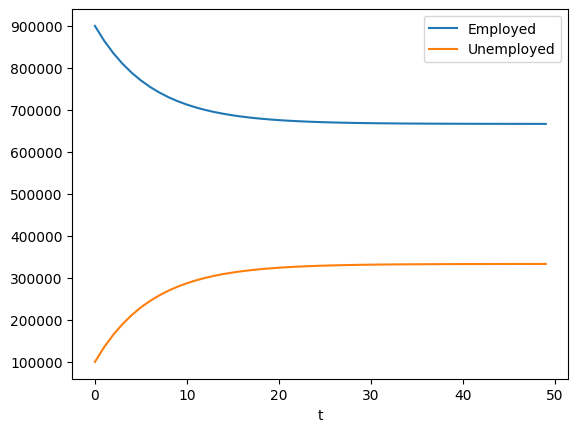

In [24]:
def plot_simulation(x0, A, T=100):
    X = simulate(x0, A, T)
    fig, ax = plt.subplots()
    ax.plot(X[:, 0])
    ax.plot(X[:, 1])
    ax.set_xlabel("t")
    ax.legend(["Employed", "Unemployed"])
    return ax

plot_simulation(x0, A, 50)

Notice that the levels of unemployed an employed workers seem to be heading to constant numbers.

We refer to this phenomenon as *convergence* because the values appear to converge to a constant
number.

Let's check that the values are permanently converging.

<Axes: xlabel='t'>

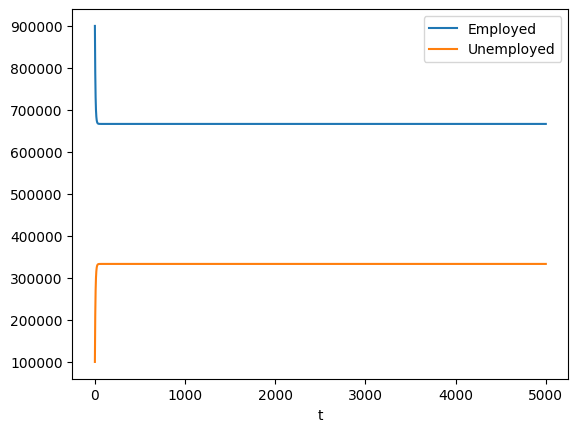

In [25]:
plot_simulation(x0, A, 5000)

The convergence of this system is a property determined by the matrix $A$.

The long-run distribution of employed and unemployed workers is equal to the [eigenvector](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)
of $A'$ that corresponds with the eigenvalue equal to 1. (An eigenvector of $A'$ is also known as a "left-eigenvector" of $A$.)

Let's have numpy compute the eigenvalues and eigenvectors and compare the results to our simulated results above:

In [26]:
eigvals, eigvecs = np.linalg.eig(A.T)
for i in range(len(eigvals)):
    if eigvals[i] == 1:
        which_eig = i
        break

print(f"We are looking for eigenvalue {which_eig}")

We are looking for eigenvalue 0


Now let's look at the corresponding eigenvector:

In [27]:
dist = eigvecs[:, which_eig]

# need to divide by sum so it adds to 1
dist /= dist.sum()

print(f"The distribution of workers is given by {dist}")

The distribution of workers is given by [0.66666667 0.33333333]


````{admonition} Exercise
:name: dir3-3-3

See exercise 3 in the {ref}`exercise list <ex3-3>`.
````

(ex3-3)=
## Exercises

### Exercise 1

Alice is a stock broker who owns two types of assets: A and B. She owns 100
units of asset A and 50 units of asset B. The current interest rate is 5%.
Each of the A assets have a remaining duration of 6 years and pay
\$1500 each year, while each of the B assets have a remaining duration
of 4 years and pay \$500 each year. Alice would like to retire if she
can sell her assets for more than \$500,000. Use vector addition, scalar
multiplication, and dot products to determine whether she can retire.

({ref}`back to text <dir3-3-1>`)

### Exercise 2

Which of the following operations will work and which will
create errors because of size issues?

Test out your intuitions in the code cell below

```{code-block} python
x1 @ x2
x2 @ x1
x2 @ x3
x3 @ x2
x1 @ x3
x4 @ y1
x4 @ y2
y1 @ x4
y2 @ x4
```

In [28]:
# testing area

({ref}`back to text <dir3-3-2>`)

### Exercise 3

Compare the distribution above to the final values of a long simulation.

If you multiply the distribution by 1,000,000 (the number of workers), do you get (roughly) the same number as the simulation?

In [29]:
# your code here

({ref}`back to text <dir3-3-3>`)